In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


Nell'ambito della meccanica quantistica, un sistema è descritto da un generico ket.
Quest'ultimo può risultare una sovrapposizione di diversi ket, ciascuno dei quali viene moltiplicato per un opportuno coefficiente complesso. Il loro significato è ben preciso all'interno di questo amibito: individua la probabilità, in termini quantistici non classici, che il sistema si possa trovare in un determinato stato quantistico.
Tale argomentazione ha significato quando il sistema è descritto da uno spazio di Hilbert caratterizzato da una base finita(come lo spin).

Molto spesso si studiano osservabili i quali possono assumere valori continui, come la posizione o l'impulso. In tal caso, ha più significato introdurre l'autofunzione $\Psi(\vec r)$. Il modulo quadro $|\Psi(\vec r)|^2$ è di estrema importanza in meccanica quantistica poichè descrive la densità di probabilità.

Una volta risolta l'equazione di Schrodinger, si può calcolare la densità di probabilità del sistema. 
Uno dei pochi problemi caratterizzati da una soluzione esatta è quello dell'atomo di idrogeno. La sua semplicità deriva dall'assenza dell'interazione tra gli elettroni la quale semplifica notevolmente il problema. Per atomi a più elettroni, possono essere utilizzati metodi come Hartree-Fock o la teoria DFT.
La soluzione analitica dell'atomo di idrogeno è

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

dove $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm è il raggio di Bohr, $L_{n-l-1}^{2l+1}$ sono i polinomi generalizzati di Laguerre $n-l-1$, $n=1,2,...$ è il numero quantico principale, $l=0,1, ..., n-1$ è il numero quantico azimutale, $m=-l, -l+1, ..., l-1, l$ il numero quantico magnetico.

In particolare, il ground state(1s) e il primo eccitato(2p) di una particella in 3-D senza spin, non relativisitca
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$

$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$


Sarebbe curioso poter capire come si distribuiscono le particelle nello spazio secondo tali $|\Psi(\vec r)|^2$; tale obbiettivo può essere raggiunto trovando l'inversa della cumulativa ma non è questo il caso.

Un metodo alternativo per il campionamento è quello proposto da Metropolis.
L'algoritmo costruisce un random walk per l'osservabile che si vuole campionare, accettando o rigettando una nuova posizione proposta. Uno dei peggiori difetti è legato alla convergenza: l'algoritmo inizia a campionare nel modo corretto solo asintoticamente. <br>
Bisogna prestare particolare attenzione anche alla correlazione delle misure. Se si costruisse un random walk con un passo troppo piccolo, si rischierebbe di ottenere misure estremamente correlate; se fosse troppo grande, molte misure potrebbero essere rigettate. Per tali motivi bisogna scegliere un passo che permetta di ottenere un'accettenza del 50%.

### Esercizio 5.1.
Le figure sottostanti mostrano la tipica forma della nube elettronica dell'orbitale 1s e 2p derivante dal campionamento della rispettiva distribuzione di probabilità.
Nel programma il raggio di Bohr è unitario.

Il passo scelto è di 1.2, per l'orbitale 1s, e 3.0, per l'orbitale 2p, in modo tale da avere un'accettanza di circa 50%.
Per l'orbitale 1s, ho scelto le coordiante (0,0,rb) come condizione iniziale: in questo modo non inizio a campionare dalle code della distribuzione. 
Per un motivo analogo, partire dall'origine non è la scelta migliore.
Quando impongo come condizione iniziale una coordinata lontana dall'origine, si osserva che vi sono dei punti 
distanti rispetto alle nubi elettroniche 1s e 2p mentre molti altri si dispongono per formare la classica nube.

Per l'orbitale 2p, la condizione iniziale prevede coordinate (rb,rb,rb).

Se scegliessi di campionare le posizioni con una distribuzione gaussiana, otterrei gli stessi risultati ottenuti 
con quella uniforme. In questo caso i passi per avere la stessa accettanza sono diversi.



        Nube elettronica: orbitale 1s


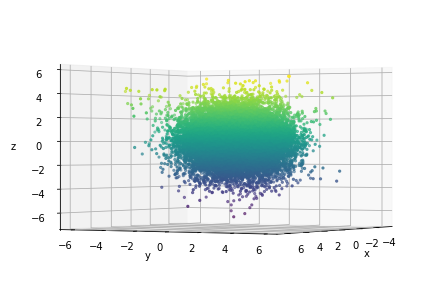

In [4]:
X, Y, Z= np.loadtxt("./Es5.1./orbitale1s.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
print("        Nube elettronica: orbitale 1s")
ax.view_init(0, 30)
plt.show()

        Nube elettronica: orbitale 2p


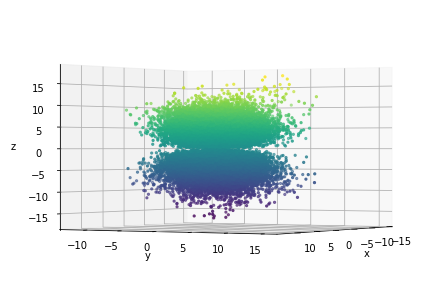

In [59]:
X, Y, Z= np.loadtxt("./Es5.2./orbitale2p.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
print("        Nube elettronica: orbitale 2p")
ax.view_init(0, 30)
plt.show()

Tramite il metodo data-blocking ho verificato i valori medi della distanza. Ho graficato il numero del blocco
contro la media ottenuta, decorando ogni punto con la barra d'errore corrispondente.
I valori ottenuti per via teorica sono 

$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>

/home/leo/Scrivania/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


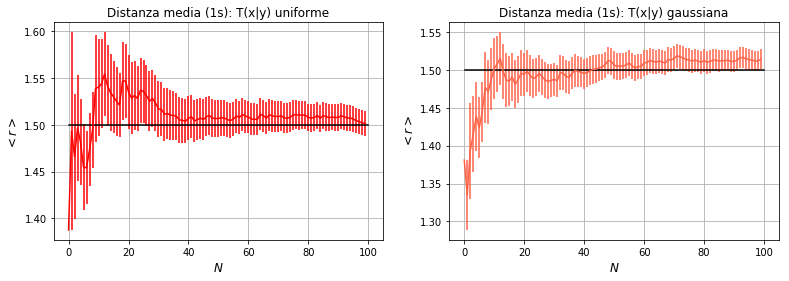

/home/leo/Scrivania/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


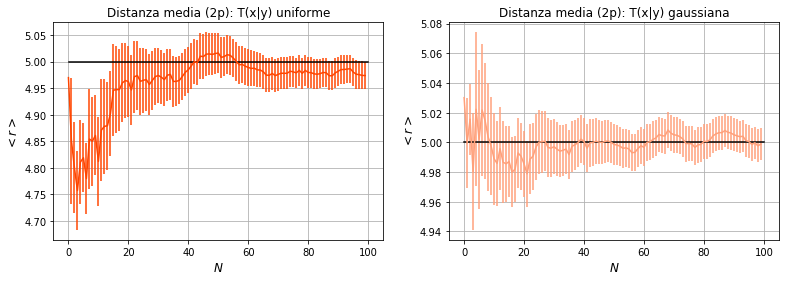

In [7]:
fig, (f1, f2) = plt.subplots(1,2,figsize=(13,4))

x, f, error = np.loadtxt("./Es5.1./Statistica", usecols=(0,1,2), delimiter=' ', unpack='true')
f1.errorbar(x,f,yerr=error, color="red")
f1.set_xlabel('$N$', fontsize=12)
f1.set_ylabel('$<r>$ ', fontsize=12)
f1.set_title('Distanza media (1s): T(x|y) uniforme', fontsize=12)
f1.grid(True)
x, f, error = np.loadtxt("./Es5.1.(gauss)/Statistica", usecols=(0,1,2), delimiter=' ', unpack='true')
f2.errorbar(x,f,yerr=error, color="tomato")
f2.set_xlabel('$N$', fontsize=12)
f2.set_ylabel('$<r>$', fontsize=12)
f2.set_title('Distanza media (1s): T(x|y) gaussiana', fontsize=12)
f2.grid(True)

s=np.linspace(0,100,1000)
t=1.5*(s/s)
f1.plot(s,t, color="black")
f2.plot(s,t, color="black")
plt.show()

fig, (f1, f2) = plt.subplots(1,2,figsize=(13,4))

x, f, error = np.loadtxt("./Es5.2./Statistica", usecols=(0,1,2), delimiter=' ', unpack='true')
f1.errorbar(x,f,yerr=error, color="orangered")
f1.set_xlabel('$N$', fontsize=12)
f1.set_ylabel('$<r>$ ', fontsize=12)
f1.set_title('Distanza media (2p): T(x|y) uniforme', fontsize=12)
f1.grid(True)
x, f, error = np.loadtxt("./Es5.2.(gauss)/Statistica", usecols=(0,1,2), delimiter=' ', unpack='true')
f2.errorbar(x,f,yerr=error, color="lightsalmon")
f2.set_xlabel('$N$', fontsize=12)
f2.set_ylabel('$<r>$', fontsize=12)
f2.set_title('Distanza media (2p): T(x|y) gaussiana', fontsize=12)
f2.grid(True)

s=np.linspace(0,100,1000)
t=5.0*(s/s)
f1.plot(s,t, color="black")
f2.plot(s,t, color="black")
plt.show()